# Requirements

In [3]:
!pip install missingno

Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [1]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.linear_model import Ridge
from sklearn.kernel_ridge import KernelRidge
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_predict, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve

In [7]:
# Add as many imports as you need.

## Smoking Analysis


# Dataset Description

## Attributes

* id - patient identifier
* age - patient age
* height(cm) - patient height in cm
* weight(kg) - patient weight in kg
* waist(cm) - patient waist diameter in cm
* systolic - patient systolic blood pressure
* relaxation - patient relaxation blood pressure
* fasting blood sugar - patient blood sugar level
* Cholesterol - patient cholesterol level
* triglyceride - patient triglyceride level
* HDL - patient high-density lipoprotein cholesterol level
* LDL - patient low-density lipoprotein cholesterol level
* hemoglobin - patient hemoglobin level
* Urine protein - patinet protein in urine level
* serum creatinine - patient serum creatinine level
* AST - patient aspartate aminotransferase level
* ALT - patient Alanine transaminase level
* Gtp - patient Guanosine-5'-triphosphate level
* dental caries - does patient have dental caries



### Target variable
smoking

# Read the dataset

In [3]:
# Write your code here. Add as many boxes as you need.
df = pd.read_csv('smoking.csv')
df

,id,age,height(cm),weight(kg),waist(cm),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,NaN,NaN,180.0,65.0,NaN,112.0,70.0,NaN,149.0,NaN,NaN,87.0,13.9,1.0,NaN,19.0,NaN,NaN,No,0.0
1,57468.0,1979-07-05,150.0,50.0,NaN,138.0,88.0,92.0,219.0,LOW,NaN,137.0,13.2,NaN,0.6,26.0,17.0,NaN,No,0.0
2,55209.0,1954-11-27,175.0,75.0,99.3,137.0,NaN,NaN,217.0,NORMAL,50.0,142.0,NaN,1.0,0.8,22.0,22.0,NaN,No,1.0
3,3335.0,1984-09-13,160.0,NaN,74.0,133.0,NaN,100.0,160.0,HiGH,48.0,84.0,12.1,1.0,0.6,15.0,19.0,14.0,No,0.0
4,70782.0,1984-08-15,170.0,NaN,66.0,NaN,68.0,99.0,176.0,LOW,NaN,96.0,13.8,1.0,0.9,33.0,NaN,11.0,No,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,43983.0,NaN,180.0,75.0,84.0,120.0,69.0,100.0,180.0,ABNORMAL,76.0,98.0,14.7,NaN,0.8,29.0,39.0,73.0,No,1.0
9996,65781.0,NaN,160.0,NaN,81.0,110.0,72.0,100.0,NaN,NORMAL,NaN,99.0,15.3,1.0,0.7,22.0,49.0,91.0,No,NaN
9997,125800.0,1989-08-03,165.0,65.0,73.1,128.0,72.0,83.0,207.0,NaN,65.0,134.0,NaN,1.0,0.9,20.0,21.0,23.0,No,0.0
9998,6795.0,NaN,160.0,75.0,81.0,121.0,82.0,88.0,NaN,HiGH,63.0,112.0,14.4,1.0,0.9,18.0,15.0,64.0,No,0.0


Explore the dataset using visualizations of your choice.

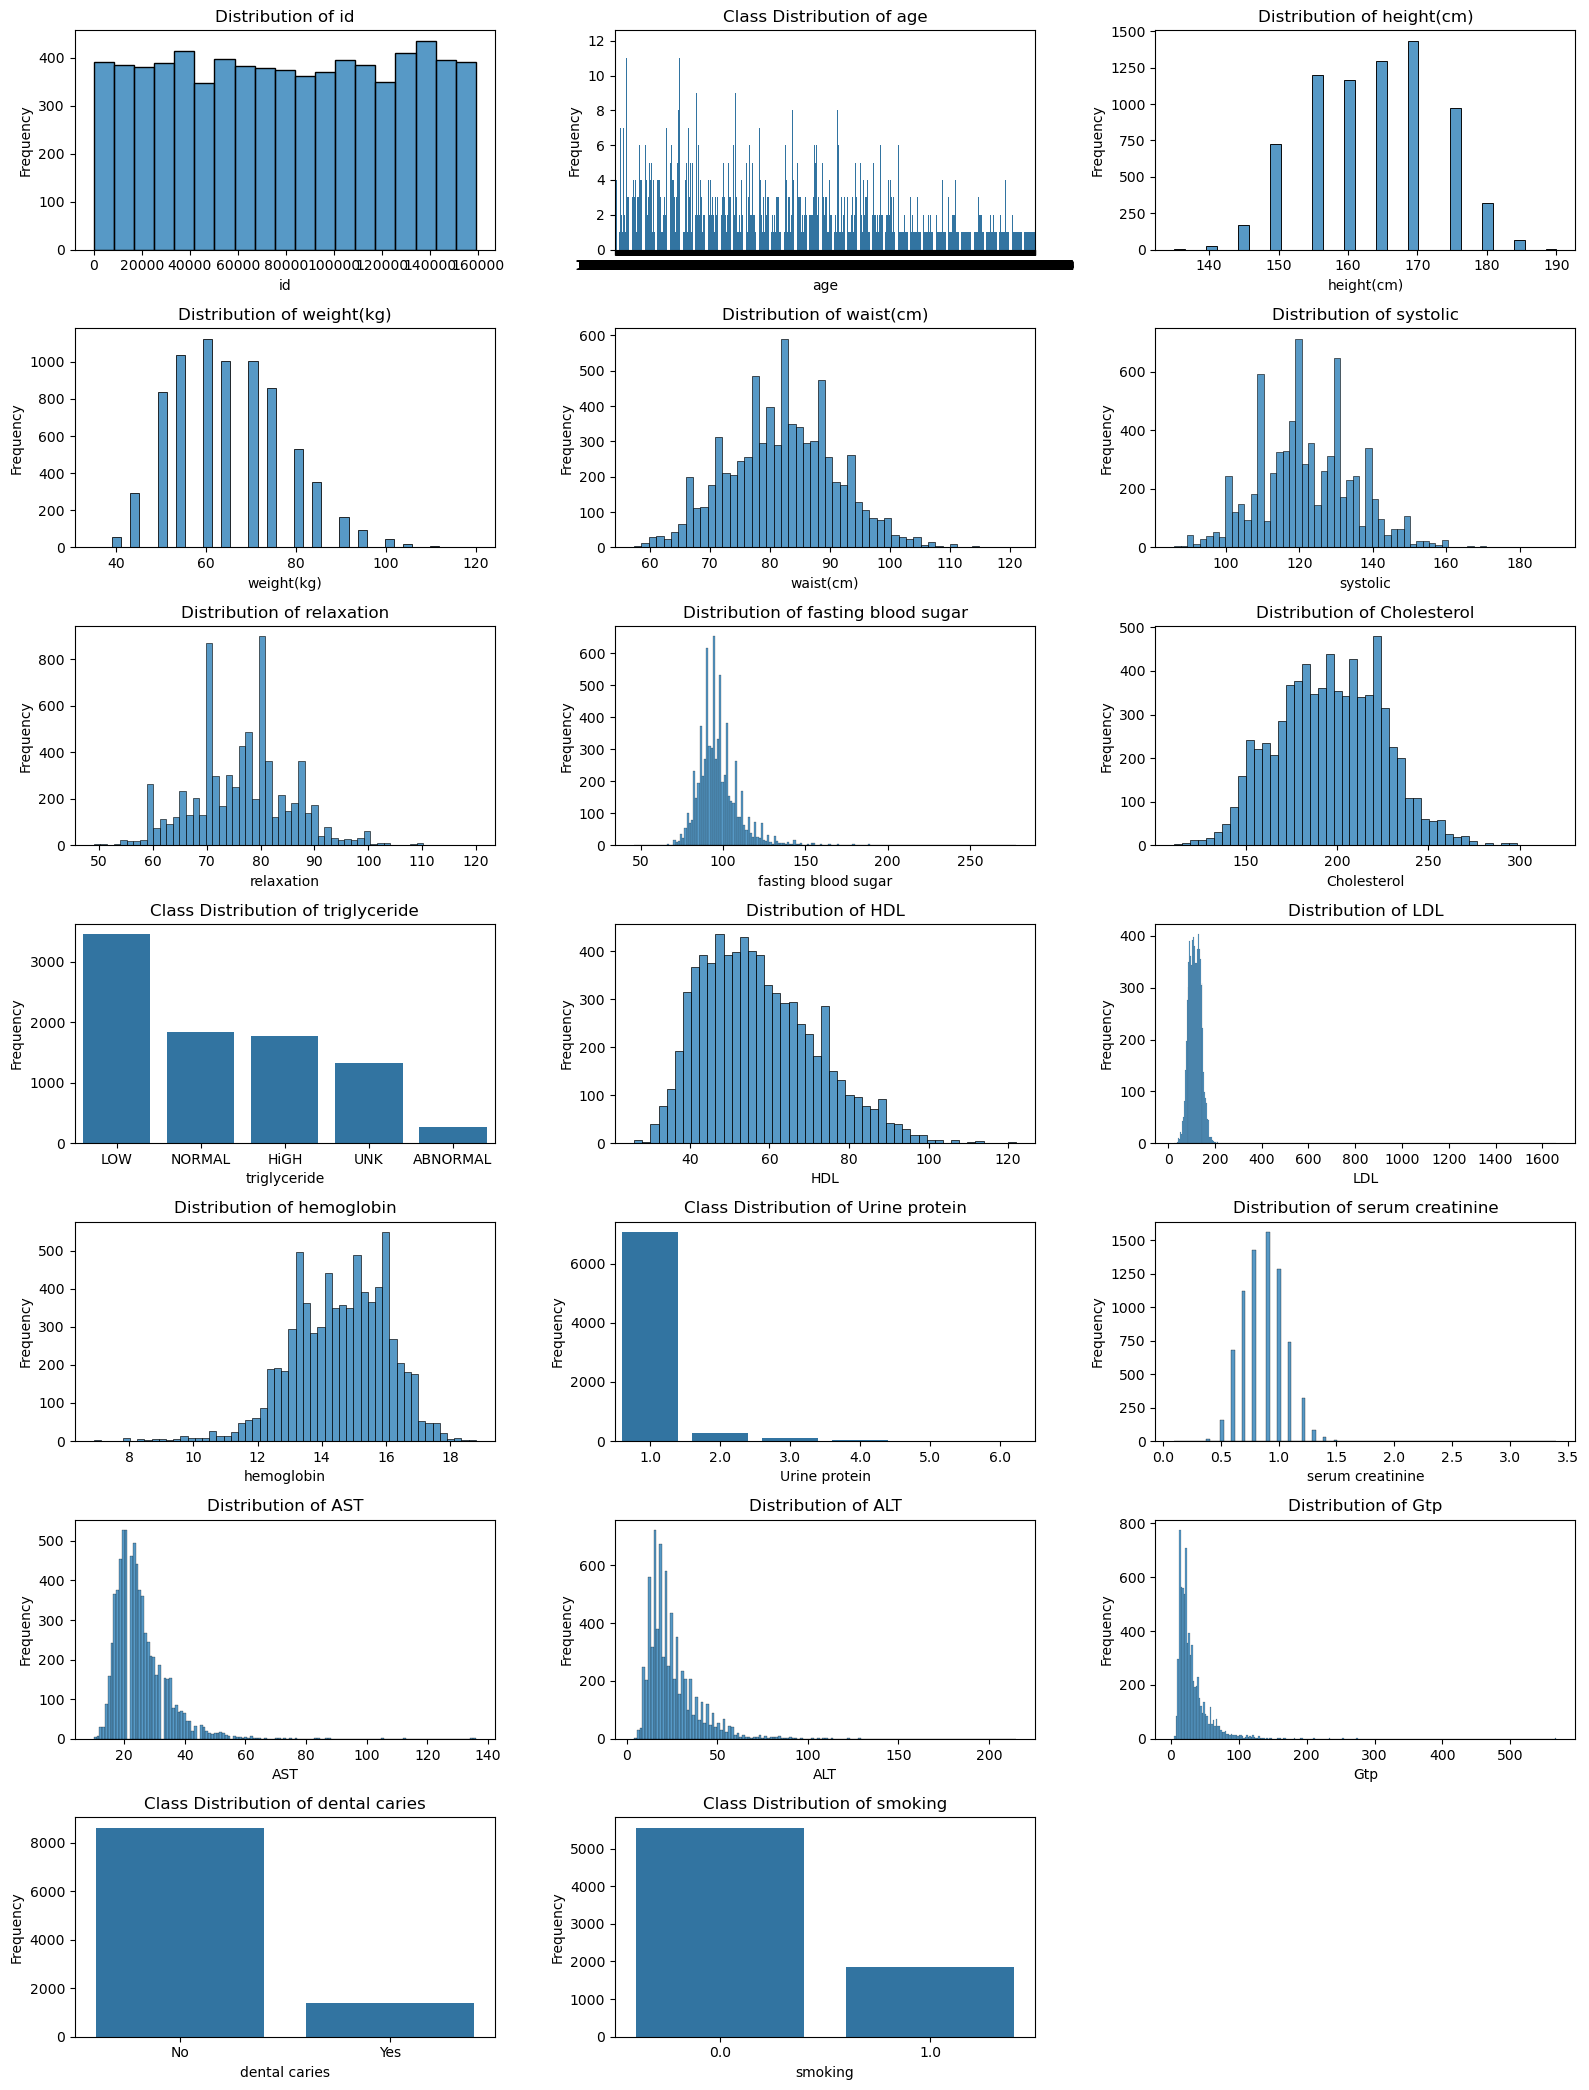

In [5]:
# Write your code here. Add as many boxes as you need.
num_features = len(df.columns)
num_cols = 3  # Set a fixed number of columns
num_rows = math.ceil(num_features / num_cols)  # Calculate rows needed based on columns

# Plot each feature's distribution
plt.figure(figsize=(16, num_rows * 3))
for i, feature in enumerate(df.columns, 1):
    plt.subplot(num_rows, num_cols, i)  # Dynamically set subplot position
    if df[feature].dtype == 'object' or len(df[feature].unique()) <= 10:  # Countplot for categorical features
        sns.countplot(x=feature, data=df)
        plt.title(f'Class Distribution of {feature}')
    else:  # Histogram for continuous features
        sns.histplot(df[feature])
        plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Check if the dataset is balanced.

<function matplotlib.pyplot.show(close=None, block=None)>

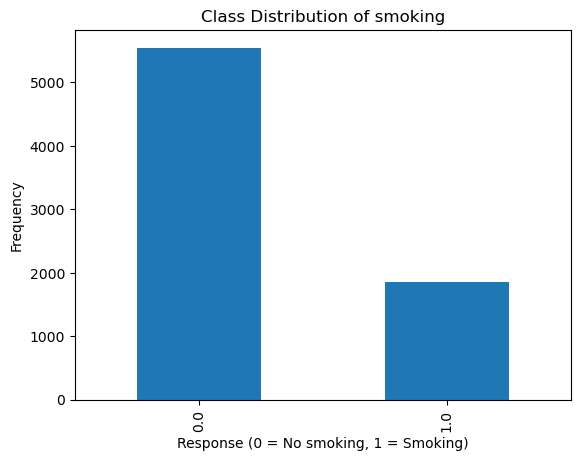

In [6]:
# Write your code here. Add as many boxes as you need.
df['smoking'].value_counts().plot.bar()
plt.title('Class Distribution of smoking')
plt.xlabel('Response (0 = No smoking, 1 = Smoking)')
plt.ylabel('Frequency')
plt.show

## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [7]:
# Write your code here. Add as many boxes as you need.
df.isnull().sum()

id                     2672
age                    2688
height(cm)             2627
weight(kg)             2556
waist(cm)              2616
systolic               2523
relaxation             2575
fasting blood sugar    2562
Cholesterol            2614
triglyceride           1356
HDL                    2609
LDL                    2642
hemoglobin             2583
Urine protein          2525
serum creatinine       2567
AST                    2573
ALT                    2584
Gtp                    2589
dental caries             0
smoking                2600
dtype: int64

In [17]:
missing_percent = df.isnull().sum()/len(df)*100
missing_percent

id                     26.72
age                    26.88
height(cm)             26.27
weight(kg)             25.56
waist(cm)              26.16
systolic               25.23
relaxation             25.75
fasting blood sugar    25.62
Cholesterol            26.14
triglyceride           13.56
HDL                    26.09
LDL                    26.42
hemoglobin             25.83
Urine protein          25.25
serum creatinine       25.67
AST                    25.73
ALT                    25.84
Gtp                    25.89
dental caries           0.00
smoking                26.00
dtype: float64

## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts. To achieve this use the `missingno` library.

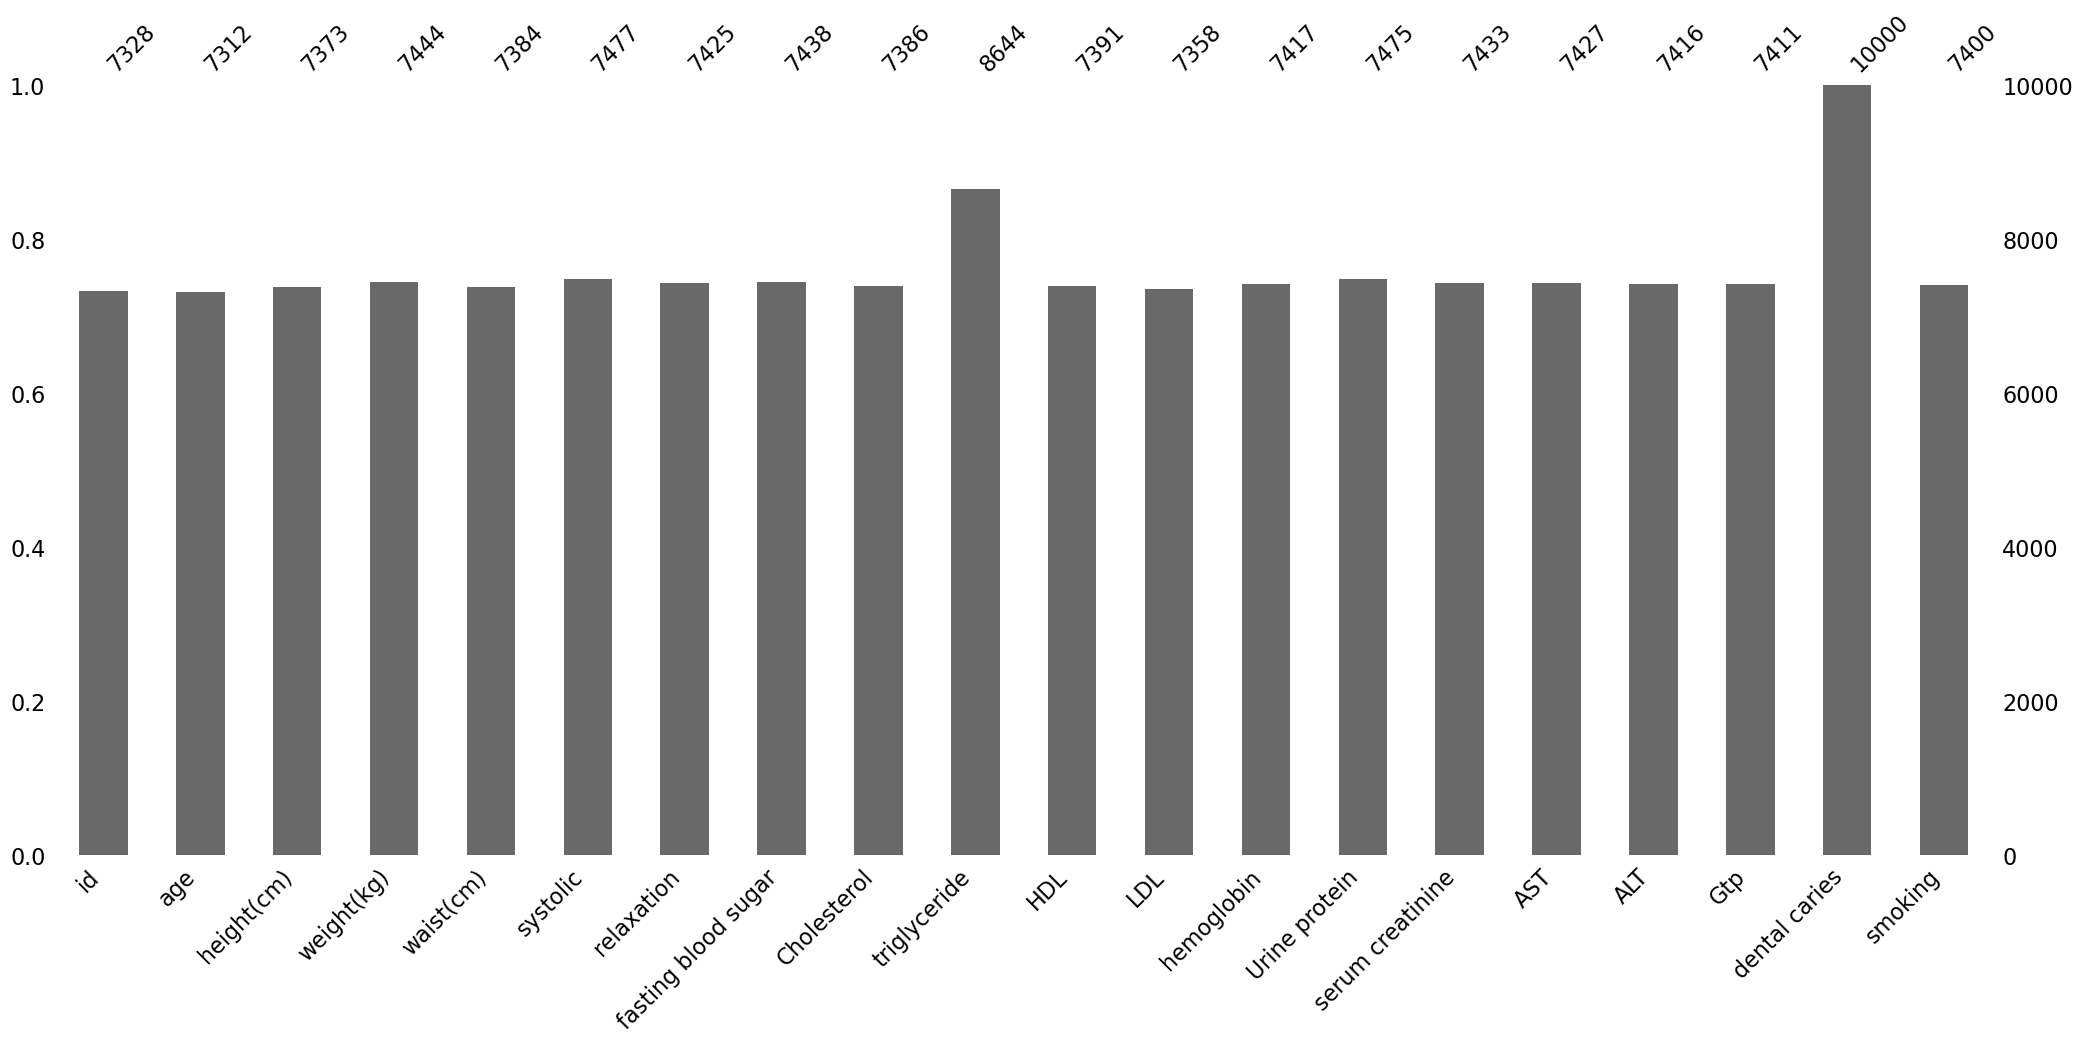

In [19]:
# Write your code here. Add as many boxes as you need.
msno.bar(df)
plt.show()

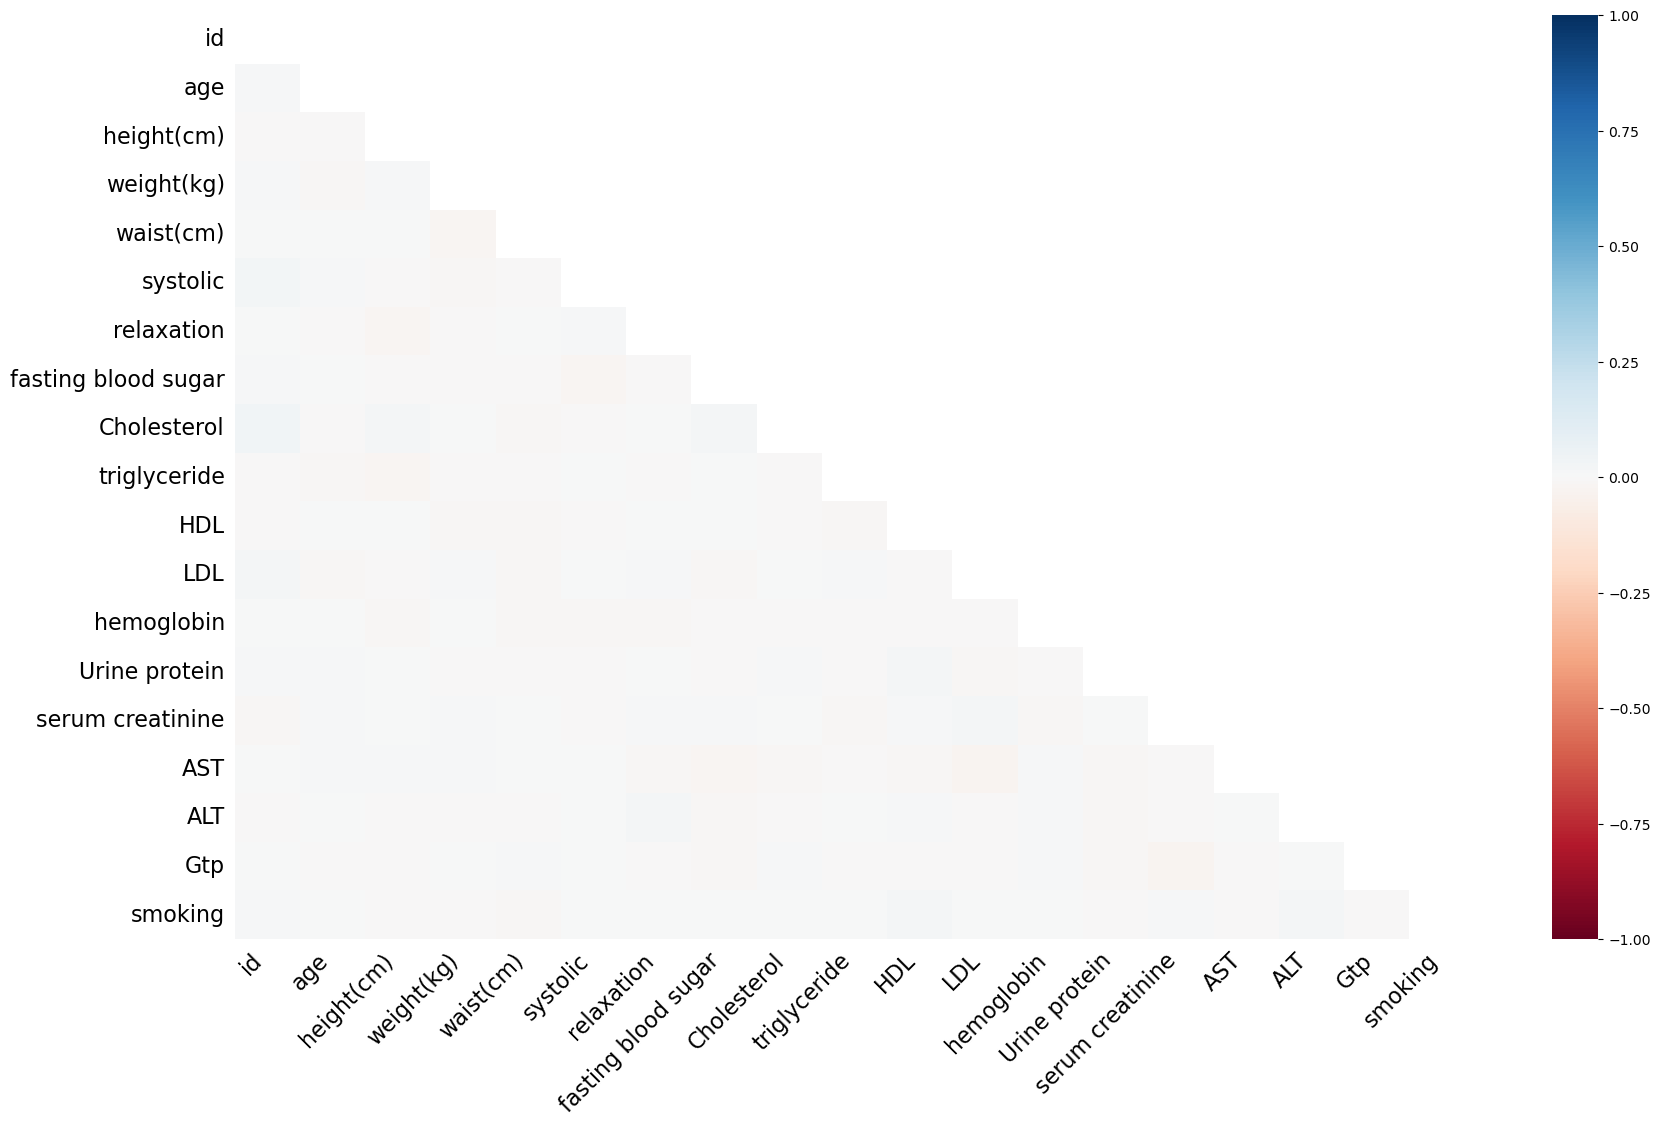

In [10]:
msno.heatmap(df)
plt.show()

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

In [21]:
# Write your code here. Add as many boxes as you need.
df = df.drop(['id', 'dental caries'], axis=1)
df.columns

Index(['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'smoking'],
      dtype='object')

In [23]:
df = df.dropna(subset=['smoking'])

In [25]:
df['height(cm)'] = df['height(cm)'].fillna(df['height(cm)'].median())

In [27]:
df['weight(kg)'] = df['weight(kg)'].fillna(df['weight(kg)'].median())

In [29]:
df['waist(cm)'] = df['waist(cm)'].fillna(df['waist(cm)'].mean())

In [31]:
df.isnull().sum()

age                    1982
height(cm)                0
weight(kg)                0
waist(cm)                 0
systolic               1865
relaxation             1896
fasting blood sugar    1882
Cholesterol            1923
triglyceride            995
HDL                    1895
LDL                    1949
hemoglobin             1907
Urine protein          1871
serum creatinine       1873
AST                    1907
ALT                    1878
Gtp                    1922
smoking                   0
dtype: int64

In [33]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['AST','ALT','Gtp']])

In [35]:
knn_imputer = KNNImputer(n_neighbors=7)
imputed_data = knn_imputer.fit_transform(scaled_data)
df[['AST','ALT','Gtp']] = scaler.inverse_transform(imputed_data)

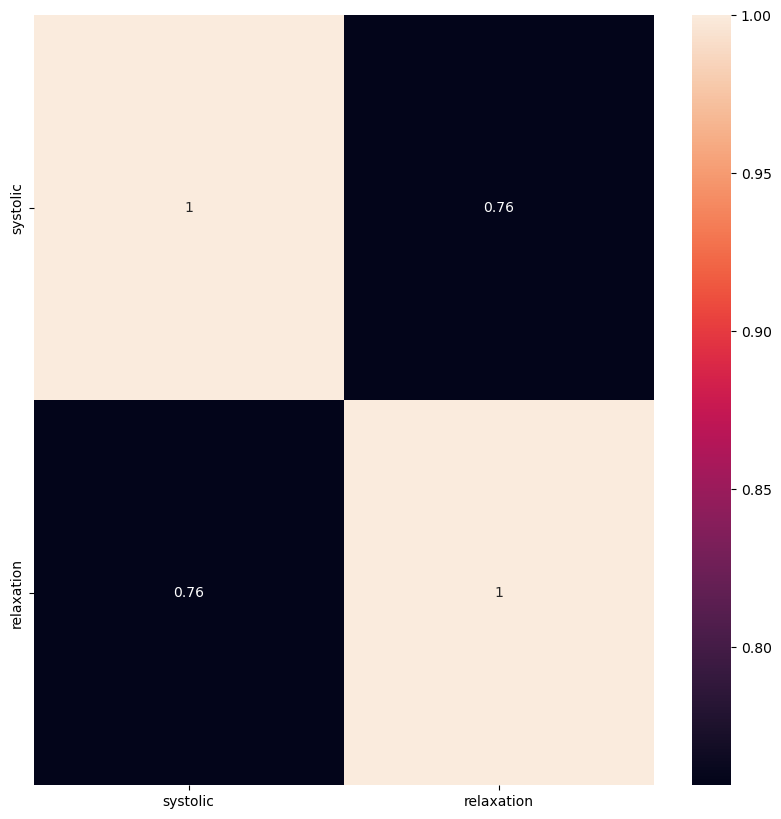

In [36]:
plt.figure(figsize=(10, 10))
sns.heatmap(df[['systolic', 'relaxation']].corr(), annot=True)
plt.show()

In [39]:
mice_imputer = IterativeImputer()
df[['systolic', 'relaxation']] = mice_imputer.fit_transform(df[['systolic', 'relaxation']])

In [41]:
df['triglyceride'] = df['triglyceride'].replace('nan', np.nan)

frequent_imputer = SimpleImputer(strategy='most_frequent')

df['triglyceride'] = frequent_imputer.fit_transform(df[['triglyceride']]).ravel()
df['triglyceride'] = df['triglyceride'].astype(str)

df.triglyceride.isnull().sum()

0

In [43]:
df['triglyceride'].value_counts()

triglyceride
LOW         3562
NORMAL      1333
HiGH        1302
UNK          995
ABNORMAL     208
Name: count, dtype: int64

In [45]:
triglyceride_encoding = {
    "LOW": 0,
    "NORMAL": 1,
    "HiGH": 2,
    "UNK": 3,
    "ABNORMAL": 4
}

In [47]:
def encode_trigl(trigl):
    return triglyceride_encoding.get(trigl)

In [49]:
df['triglyceride'] = df['triglyceride'].apply(encode_trigl)

In [53]:
df.isnull().sum()

age                    1982
height(cm)                0
weight(kg)                0
waist(cm)                 0
systolic                  0
relaxation                0
fasting blood sugar    1882
Cholesterol            1923
triglyceride              0
HDL                    1895
LDL                    1949
hemoglobin             1907
Urine protein          1871
serum creatinine       1873
AST                       0
ALT                       0
Gtp                       0
smoking                   0
dtype: int64

In [63]:
df['serum creatinine'] = df['serum creatinine'].fillna(df['serum creatinine'].mean())

In [69]:
df['Urine protein'] = df['Urine protein'].replace('nan', np.nan)

frequent_imputer = SimpleImputer(strategy='most_frequent')

df['Urine protein'] = frequent_imputer.fit_transform(df[['Urine protein']]).ravel()

df.isnull().sum()

age                    1982
height(cm)                0
weight(kg)                0
waist(cm)                 0
systolic                  0
relaxation                0
fasting blood sugar    1882
Cholesterol            1923
triglyceride              0
HDL                    1895
LDL                    1949
hemoglobin             1907
Urine protein             0
serum creatinine          0
AST                       0
ALT                       0
Gtp                       0
smoking                   0
dtype: int64

In [71]:
df['hemoglobin'] = df['hemoglobin'].fillna(df['hemoglobin'].mean())

In [73]:
mice_imputer = IterativeImputer()
df[['HDL', 'LDL']] = mice_imputer.fit_transform(df[['HDL', 'LDL']])

In [75]:
df.isnull().sum()

age                    1982
height(cm)                0
weight(kg)                0
waist(cm)                 0
systolic                  0
relaxation                0
fasting blood sugar    1882
Cholesterol            1923
triglyceride              0
HDL                       0
LDL                       0
hemoglobin                0
Urine protein             0
serum creatinine          0
AST                       0
ALT                       0
Gtp                       0
smoking                   0
dtype: int64

In [77]:
mice_imputer = IterativeImputer()
df[['fasting blood sugar', 'Cholesterol']] = mice_imputer.fit_transform(df[['fasting blood sugar', 'Cholesterol']])

In [81]:
df['year_of_birth'] = 2024 - df['age'].dt.year
df['year_of_birth']

AttributeError: Can only use .dt accessor with datetimelike values

## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

In [ ]:
# Write your code here. Add as many boxes as you need.


## Feature Preprocessing


Preprocess the features to make them ready for using the model

In [ ]:
# Write your code here. Add as many boxes as you need.

## Random Forest Classification

In [ ]:
# Write your code here. Add as many boxes as you need.

Use the trained model to make predictions for the test set.

In [ ]:
# Write your code here. Add as many boxes as you need.

Assess the performance of the model by using different classification metrics provided by the `scikit-learn` library.

In [ ]:
# Write your code here. Add as many boxes as you need.